In [12]:
%run init_notebookspace.py

DATA_DIR is existant under: /Users/tsagedouglas/Data Science Project (Python Proj)/data


In [13]:
!pip install yfinance

In [14]:
!pip install pandas_datareader

In [15]:
!pip install yahoo_fin

In [16]:
import pandas as pd
import numpy as np

import yfinance as yf
import pandas_datareader as pdread
from pandas_datareader import fred

import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from yahoo_fin import stock_info as ysi

from itertools import chain

In [17]:
from src.utils import apply_datetime_format

In [18]:
# get sp500 composits & market cap
sp500_tickers = ysi.tickers_sp500()
df = pd.DataFrame(index=sp500_tickers, 
                  columns=['market_cap'], 
                  data=[pdread.get_quote_yahoo(item)['marketCap'].values[0] for item in sp500_tickers])
sp500_largest = df.sort_values('market_cap', ascending=False).index[:5].values
sp500_ticker = ['^GSPC']

In [19]:
start = '2020-01-01'
end = '2022-12-31'

In [20]:
df_prices = pd.DataFrame()
df_prices.index = pd.date_range(start, periods=(apply_datetime_format(end, '%Y-%m-%d') - apply_datetime_format(start, '%Y-%m-%d')).days)

for item in [*chain(sp500_largest, sp500_ticker)]:
    data = yf.download(item, start, end)
    data.columns = list([f'{item}_{x}' for x in data.columns])
    df_prices = df_prices.join(data)
    
# get closing price
df_c = df_prices[[item for item in df_prices.columns if 'Adj Close' in item]].copy()
df_c.columns = [item[:-10] for item in df_c.columns]
df_c.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
# get log returns
df_rets = np.log(df_c / df_c.shift(1)).dropna()
df_rets.sort_index(inplace=True)
df_rets.asfreq = "D"

df_rets['^GSPC_lead'] = df_rets['^GSPC'].shift(1)

df_rets.dropna(inplace=True)
df_rets.index.asfreq = 'd'


In [22]:
# save data to file
df_rets.to_csv(os.path.join(DATA_DIR, 'returns.csv'))

In [ ]:
# load data from file
df_rets = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'))

In [ ]:
# Error Attempts 
# original : 
# mydata = pd.read_csv('mydataset.csv', names = ['value'], header = 0)  
# mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'))  
    # But this is wrong because I need the 'value' argument 
#mydata = pd.read_csv('returns.csv', names = ['value'], header = 0)  
    # But this is wrong because it 'cannot find the file'
#mydata = pd.read_csv('returns.csv', names = ['0,AAPL,MSFT,GOOG,GOOGL,AMZN,^GSPC,^GSPC_lead'], header = 0)  
#mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['0,AAPL,MSFT,GOOG,GOOGL,AMZN,^GSPC,^GSPC_lead'], header = 0)  

# what works: mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  


In [ ]:
# Checking for stationarity via ADF test below
# dickey-fuller attempt 1 
from statsmodels.tsa.stattools import adfuller  
from numpy import log  
import pandas as pd  
  
mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

res = adfuller(mydata.value.dropna())  
                     
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

In [ ]:
# determining the ADF for the 'd' value of ARIMA 


In [ ]:
# Next looking at autocorrelation 
import numpy as np, pandas as pd  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt 
plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' : 120})
plt.show()

In [ ]:
# Importing data  
df = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

In [ ]:
#print (df)

In [ ]:
# Attempt to correct error 1 
#ndarray = df.to_numpy()
# print(ndarray)

In [ ]:
# The Genuine Series 
fig, axes = plt.subplots(3, 2, sharex = True)  
axes[0, 0].plot(df.value); axes[0, 0].set_title('The Genuine Series')  
plot_acf(df.value, ax = axes[0, 1])

In [ ]:
# Order of Differencing: First  
axes[1, 0].plot(mydata.value.diff()); axes[1, 0].set_title('Order of Differencing: First')  
plot_acf(df.value.diff().dropna(), ax = axes[1, 1])  

In [ ]:
# Order of Differencing: Second  
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('Order of Differencing: Second')  
plot_acf(df.value.diff().diff().dropna(), ax = axes[2, 1])  
plt.show()  


In [ ]:
# Determine the differencing above. Weak/ strong stationarity? 
# Next, looking at how to make the data stationary via 3 tests. 

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima.utils import ndiffs  
import pandas as pd
import os

In [ ]:
df = pd.read_csv(pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)
X = df.value  

In [ ]:
# Augmented Dickey Fuller Test  
adftest = ndiffs(df, test = 'adf')  

In [ ]:
# KPSS Test  
kpsstest = ndiffs(df, test = 'kpss')  

In [ ]:
# PP Test  
pptest = ndiffs(df, test = 'pp')  

In [ ]:
print("ADF Test =", adftest)  
print("KPSS Test =", kpsstest)  
print("PP Test =", pptest) 

In [ ]:
#Next finding the 'p' term for AR via a partial auocorrelation graph

In [ ]:
import numpy as np, pandas as pd  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt  

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})  

In [ ]:
import os

In [ ]:
# importing data 
df = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

In [ ]:
 plt.plot(df.to_numpy(), label='Close')

In [ ]:
ndarray = np.asarray(df)
print(ndarray)

In [ ]:
fig, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(ndarray); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0,5))  
plot_pacf(ndarray, ax = axes[1]) 

In [ ]:
# Look a the blue region to determine if it is useful or not
# In the PAC graph, there should be a light blue box showing the significance-- need to fix this 
# Otherwise, for PAC I would say there is an order of 1 or 2 at the moment

In [ ]:
# Results into a matrix

In [ ]:
#Next, finding the 'q' - Moving Averages
import numpy as np, pandas as pd  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt  
  
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  

In [ ]:
# Importing data  
mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

In [ ]:
 plt.plot(df.to_numpy(), label='Close')

In [ ]:
mydata = np.asarray(df)
print(mydata)

In [ ]:
fig, axes = plt.subplots(1, 2, sharex = True)  
axes[0].plot(mydata); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0, 1.2))  
plot_acf(mydata, ax = axes[1])  
plt.show() 

In [ ]:
# Looking at the autocorrelation graph, we can determine the number needed for q 
# Again, missing that blue box for significance 
#3 Otherwise, I would say that we have an order of 1 here 

In [ ]:
# Now building the ARIMA model 

import numpy as np, pandas as pd  
import statsmodels.api as sm

In [ ]:
# importing data  
mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

In [ ]:
# Creating ARIMA model  
# change the () to whatever numbers we get from the results for p,d,q above 
mymodel = sm.tsa.arima.ARIMA(mydata.value, order = (1, 1, 2))  
modelfit = mymodel.fit()  

print(modelfit.summary())  

In [ ]:
# Creating ARIMA model 2
# change the () to whatever numbers we get from the results for p,d,q above 
mymodel = sm.tsa.arima.ARIMA(mydata.value, order = (1, 0, 1))  
modelfit = mymodel.fit()  

print(modelfit.summary())

In [ ]:
# These are the results. We can alter the output by changing the AIC/ BIC if we have a close call. 

# Now we plot the residuals to ensure that there is no constant mean or varaince to worry about 

In [ ]:
import numpy as np, pandas as pd  
import statsmodels.api as sm
import matplotlib.pyplot as plt  

In [ ]:
# Plotting Residual Errors
# Work on the scale of these graphs
myresiduals = pd.DataFrame(modelfit.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

In [ ]:
# finally, graphing our predicted versus actual values for trend analysis 

In [ ]:
import numpy as np, pandas as pd  
from statsmodels.tsa.arima_model import ARIMA  
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  


In [48]:
# importing data  
mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

In [ ]:
# The best fitting aRIMA model from before
# Change the () to whatever numbers we get from the results for p,d,q above 
mymodel = sm.tsa.arima.ARIMA(mydata.value, order = (1, 0, 1))  
modelfit = mymodel.fit()  

print(modelfit.summary()) 

In [ ]:
# Actual vs Fitted  

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  
dta.index = pd.date_range(start = '2020-01-01', end = '2022-01-01', freq='A')
res = ARIMA(dta, order=(1,0,1)).fit()
fig, ax = plt.subplots()
ax = dta.loc['2020-01-01':].plot(ax=ax)
plot_predict(res, '2020-01-01', '2022-01-01', ax=ax)
plt.show()

In [ ]:
# Working on making these into a matrix 

In [ ]:
test['AAPL'].values.reshape(len(test),1)

In [ ]:
[[(x, y) for x in range (1,5)] for y in range(1, 5)]

In [ ]:
mod = ARIMA(train['^GSPC'].values, order=(1,0,1))
res = mod.fit()
res.summary()

In [ ]:
# Tryinig a different method for ARIMA so that i may b easier to outpu the coefficients iinto a matrix 
# No plots necessary, just do a function --> marix? 
# https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [24]:
df.head()

,market_cap
A,39020838912
AAL,8937632768
AAP,6569315328
AAPL,2535459389440
ABBV,278769401856


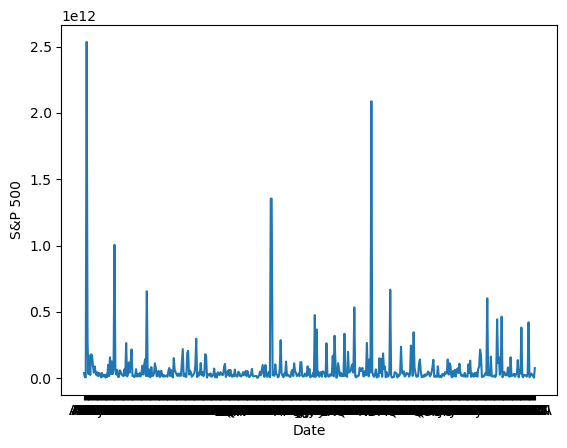

In [25]:
plt.xlabel('Date')
plt.ylabel('S&P 500')
plt.plot(df)

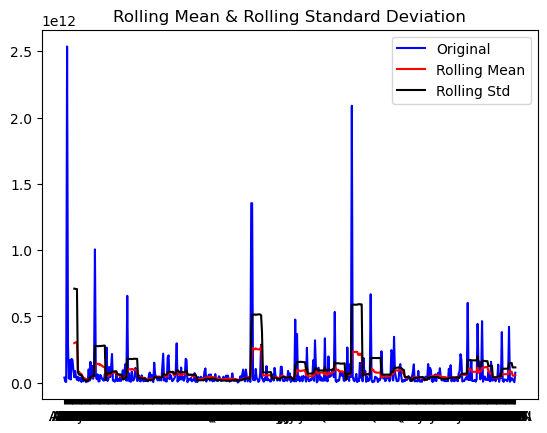

In [26]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
#As you can see, the rolling mean and rolling standard deviation do not increase with time. 
#Therefore, we can conclude that the time series is  stationary.

In [36]:
result = adfuller(df['market_cap'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


ADF Statistic: -20.327143917662045
p-value: 0.0
Critical Values:
	1%: -3.4434437319767452
	5%: -2.8673146875484368
	10%: -2.569845688481135


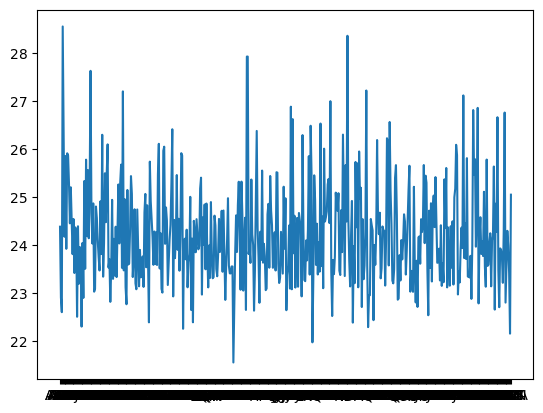

In [37]:
df_log = np.log(df)
plt.plot(df_log)

In [58]:
model = sm.tsa.arima.ARIMA(mydata.value, order = (1, 0, 1))  
results = model.fit()
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NameError: name 'df_log_shift' is not defined

In [57]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['returns'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

KeyError: 'returns'

In [ ]:
results.plot_predict(1,264)

In [34]:
print(df)

         market_cap
A       39020838912
AAL      8937632768
AAP      6569315328
AAPL  2535459389440
ABBV   278769401856
...             ...
YUM     35806208000
ZBH     26476466176
ZBRA    14842079232
ZION     4199334144
ZTS     76078874624

[503 rows x 1 columns]


In [ ]:
# no matrix :(